# CTC(2)

## All Possible Paths
- CTC기법에서는 레이블과 레이블 사이의 전이(transition)를 다음 세 가지 경우로만 한정한다.
    - selp-loop: 자기 자신을 반복한다.
    - left-to-right: non-blank 레이블을 순방향으로 하나씩 전이한다. 역방향은 허용하지 않는다. non-blank를 두 개 이상 건너뛰는 것 역시 허용이 안된다.
    - blank 관련: blank에서 non-blank, non-blank에서 blank로 전이를 허용한다.
- CTC 입력 확률 벡터 시퀀스가 8개이고 정답 레이블 시퀀스 l이 'h,e,l,l,o'일 때 위와 같은 제약을 바탕으로 가능한 모든 경로(path)를 상정해본 결과는 그림3과 같다.
- l의 시작과 끝, 레이블 사이사이에 blank를 추가한 시퀀스를 $l^\prime$이라고 한다.
- blank는 -로 표기한다.
- $l^\prime$의 길이는 2 x |l| + 1이 된다.
- 그림3 가로축은 이해를 돕기 위해 $l^\prime$을 순서대로 그린 것에 해당한다.
- 사실은 같은 시점에 중복된 레이블에 해당하는 $y$ 확률값은 동일하며 $l^\prime$말고도 나머지 레이블 역시 있다고 상상하면 좋을 것 같다.
- 그림3에서 녹색 실선에 대응하는 것은 'hello---', 검정색 실선에 대응하는 것은 '---hello'이다.

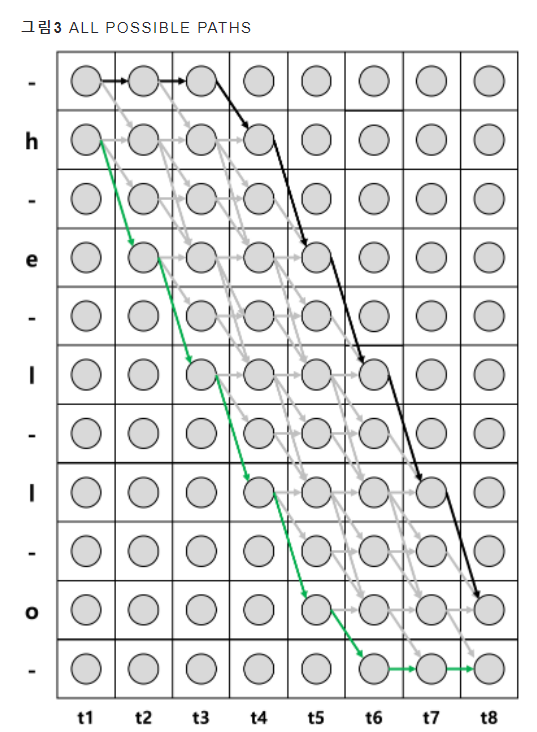

- 그림4는 그림3에서 해당 언어 주음 규칙상 절대로 발음될 수 없는 일부 경로들을 제거해 컴팩트하게 다시 그린 것이다.
- 녹색 실선에 대응하는 것은 'hel-lo--', 검정색 실선에 대응하는 것은 '--hel-lo'이다.
- 앞으로는 그림4를 기준으로 손실 및 그래디언트를 계산한다.

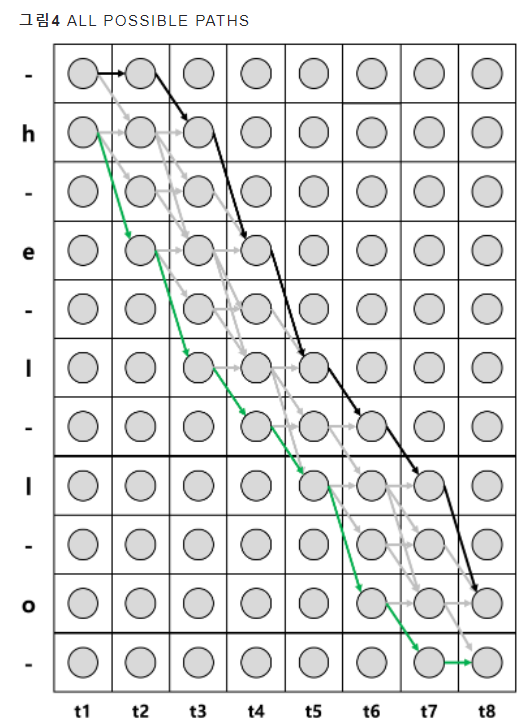

- 그림4에서 가로축은 시간(time, 인덱스는 $t$로 표기)을 나타낸다.
- 세로축은 상태(state, 음소, 인덱스는 $s$로 표기)
- 각 세로 열은 각 시점에 해당하는 확률 벡터이다.
- 동그라미는 개별 확률값을 의미한다.
- 예컨대 그림4 2번째 행, 2번째 열의 동그라미는 $y^2_h$ , 즉 $t = 2$ 시점에 -가 나타낼 확률을 뜻한다.
- $π$란 그림4의 좌측 상단에서 출발해 우측 하단에 도착하는 많은 경로 가운데 하나를 가리킨다.
- $π$는 -로 시작하거나 레이블 시퀀스 $l$의 첫번째 레이블로 시작할 수 있다.
- 아울러 $π$는 $l$의 마지막 레이블로 끝나거나 -로 종료할 수 있다.
- 만일 검정색 실선이 $π$라고 가정하면 $π$는 --hel-lo가 된다.
- $\pi_t = 3$은 h, 즉 $s = 2$가 된다.
- CTC 기법에서는 각 상태가 조건부 독립(conditional independence)라고 가정한다.
- 다시 말해 입력 음성 피처 시퀀스 x에만 $y$확률값들이 변할 뿐, 이전/이후 상태가 어떻든 그 값이 변하지 않는다고 가정하는 것이다.
- 이렇게 가정하면 x가 주어졌을 때 $π$가 나타날 확률을 수식1처럼 $y^t_{\pi_t}$의 곱으로 나타낼 수 있다.

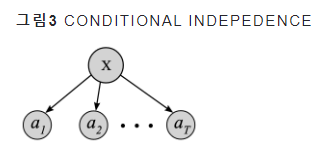

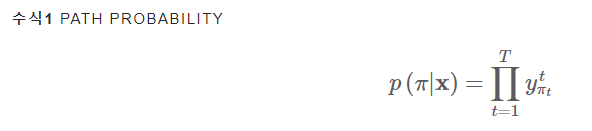

- 입력 음성 피처 시퀀스 x가 주어졌을 때 정답 레이블 시퀀스 $l$이 나타날 확률은 **상정 가능한 모든 경로(π)들의 확률, 즉 p(π|x)를 더해주면 된다.**
- 이를 식으로 나타낸 결과는 수식2와 같다.
- 여기에서 $B$를 주목할 필요가 있다.
- $B$는 blank와 중복된 레이블을 제거하는 함수
- $B(hheell-lo-) = B(hello)$
- $B^{-1}(l)$은 blank와 중복된 레이블을 제거해서 $l$이 될 수 있는 모든 가능한 경로들의 집합을 의미한다.
- 그림4에서 회색 화살표 위를 지나는 모든 경로들이 $B^{-1}(l)$에 해당한다.

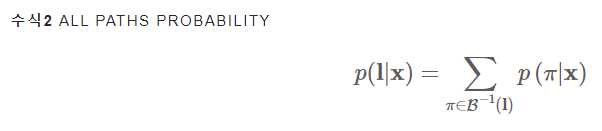